In [145]:
# Imports
import numpy as np
from LRFutils import color
import matplotlib.pyplot as plt

In [146]:
# Util functions

# ----------------------------------------------------------------------------------------------------
# Compute n first values of E for several values of e

def compute(next_E:function, M:float, e_list:list[float], n_max:int) -> dict[list[float]]:
    E_collection = dict.fromkeys(e_list, None)

    for e in e_list:

        # Partial application with locally constant parameters
        E_np1 = lambda E: next_E(M=M, E=E, e=e)
        # E_np1(En:float) -> float
        
        # Compute the first E values
        E = [E_np1(None)]

        # Compute the 9 next E values
        for _ in range(n_max):
            E_n = E[-1]
            E.append(E_np1(E_n))
        
        # Store the E values
        E_collection[e] = E
    
    return E_collection



# ----------------------------------------------------------------------------------------------------
# Display the results in columns

def print_in_columns(E:dict[list[float]]) -> None:

    # Iteration column title
    print(f"{color.Red + color.on_Green} Iteration {color.NC}\t", end="")

    # e columns title
    e_list = list(E.keys())
    for e in e_list:
        print(f"{color.Red + color.on_Green} e = {e} {color.NC}\t", end="")

    # Separation
    print("\n")

    # Iteration columns
    nb_rows = max(len(E[e]) for e in E.keys())
    for i in range(nb_rows):
        print(i, end="\t\t")
        for e in e_list:
            c = color.Red
            if i >= 1 and np.round(E[e][i],3) == np.round(E[e][i-1],3):
                c = color.Green
            print(f"{c}{E[e][i]:.3f}{color.NC}", end="\t\t")
        print("") # line break



# ----------------------------------------------------------------------------------------------------
# Display the results as plots

def plot_E(E:dict[list[float]]) -> None:
    for e in E.keys():
        plt.plot(E[e], label=f"e = {e}")
    plt.xlabel("Iteration")
    plt.ylabel("E")
    plt.legend()
    plt.grid()
    plt.show()

<div align=center>

---
# 2 - Numerical resolution

</div>

## 2.1 Fixed-point algorithm

 Iteration 	 e = 0.1 	 e = 0.7 	 e = 0.95 	 e = 1.5 	

0		1.000		1.000		1.000		1.000		
1		1.084		1.589		1.799		2.262		
2		1.088		1.700		1.925		2.156		
3		1.089		1.694		1.891		2.251		
4		1.089		1.695		1.902		2.166		
5		1.089		1.695		1.898		2.242		
6		1.089		1.695		1.899		2.175		
7		1.089		1.695		1.899		2.235		
8		1.089		1.695		1.899		2.182		
9		1.089		1.695		1.899		2.229		
10		1.089		1.695		1.899		2.187		
11		1.089		1.695		1.899		2.224		
12		1.089		1.695		1.899		2.191		
13		1.089		1.695		1.899		2.221		
14		1.089		1.695		1.899		2.194		
15		1.089		1.695		1.899		2.218		
16		1.089		1.695		1.899		2.197		
17		1.089		1.695		1.899		2.216		
18		1.089		1.695		1.899		2.199		
19		1.089		1.695		1.899		2.214		
20		1.089		1.695		1.899		2.200		
21		1.089		1.695		1.899		2.212		
22		1.089		1.695		1.899		2.202		
23		1.089		1.695		1.899		2.211		
24		1.089		1.695		1.899		2.203		
25		1.089		1.695		1.899		2.210		
26		1.089		1.695		1.899		2.204		
27		1.089		1.695		1.899		2.210		
28		1.089		1.695		1.899		2.204	

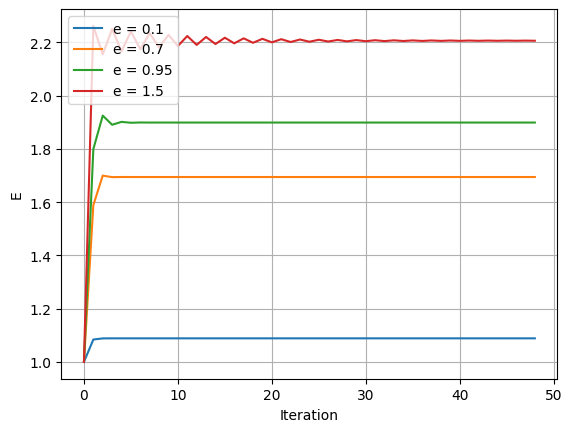

In [147]:
def next1_E(M, E=None, e=None):
    if E is None:
        return M
    else:
        return M + e * np.sin(E)

M = 1
e_list = [0.1,0.7,0.95,1.5]

E_collection = compute(next1_E, M, e_list, 48)
print_in_columns(E_collection)
plot_E(E_collection)

## 2.2 Newton's method

 Iteration 	 e = 0.1 	 e = 0.7 	 e = 0.95 	 e = 1.5 	

0		1.000		1.000		1.000		1.000		
1		1.089		1.947		2.642		7.659		
2		1.089		1.712		1.995		0.348		
3		1.089		1.695		1.902		-2.488		
4		1.089		1.695		1.899		-1.312		
5		1.089		1.695		1.899		0.086		
6		1.089		1.695		1.899		-2.023		
7		1.089		1.695		1.899		-1.012		
8		1.089		1.695		1.899		2.602		
9		1.089		1.695		1.899		2.238		
10		1.089		1.695		1.899		2.207		
11		1.089		1.695		1.899		2.207		


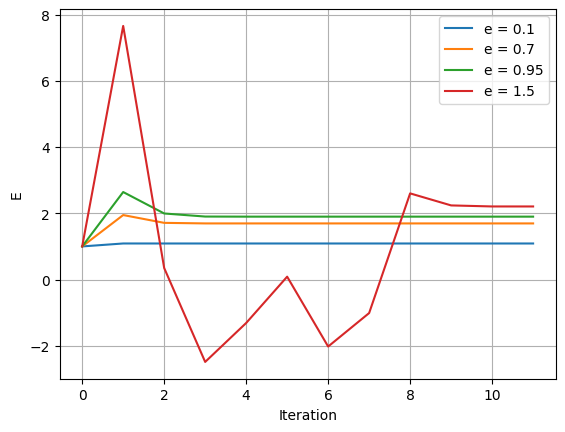

In [148]:
def next2_E(M, E=None, e=None):
    if E is None:
        return M
    else:
        return E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        
M = 1
e_list = [0.1,0.7,0.95, 1.5]

E_collection = compute(next2_E, M, e_list, 11)
print_in_columns(E_collection)
plot_E(E_collection)

We see that the Newton's method is much faster than the fixed-point algorithm. The convergence is quadratic.

<div align=center>

---
# 3 - Sum of a series

</div>